In [26]:
import missingno as msno #pip install missingno
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from wordcloud import WordCloud


In [27]:
pip install wordcloud matplotlib


Note: you may need to restart the kernel to use updated packages.


In [28]:
pip install missingno 

Note: you may need to restart the kernel to use updated packages.


In [29]:
df=pd.read_csv('survey.csv')

In [30]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [31]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

* 'Timestamp' -> 'Zaman Damgası', 
* 'Age' -> 'Yaş', 
* 'Gender' -> 'Cinsiyet', 
* 'Country' -> 'Ülke', 
* 'state' -> 'Eyalet', 
* 'self_employed' -> 'Serbest Çalışan', 
* 'family_history' -> 'Aile Geçmişi', 
* 'treatment' -> 'Tedavi', 
* 'work_interfere' -> 'İş Müdahalesi', 
* 'no_employees' -> 'Çalışan Sayısı', 
* 'remote_work' -> 'Uzaktan Çalışma', 
* 'tech_company' -> 'Teknoloji Şirketi', 
* 'benefits' -> 'Faydalar', 
* 'care_options' -> 'Bakım Seçenekleri', 
* 'wellness_program' -> 'Sağlık Programı', 
* 'seek_help' -> 'Yardım Arama', 
* 'anonymity' -> 'Anonimlik', 
* 'leave' -> 'İzin', 
* 'mental_health_consequence' -> 'Ruh Sağlığı Sonucu', 
* 'phys_health_consequence' -> 'Fiziksel Sağlık Sonucu', 
* 'coworkers' -> 'İş Arkadaşları', 
* 'supervisor' -> 'Yönetici', 
* 'mental_health_interview' -> 'Ruh Sağlığı Görüşmesi', 
* 'phys_health_interview' -> 'Fiziksel Sağlık Görüşmesi', 
* 'mental_vs_physical' -> 'Ruhsal vs Fiziksel', 
* 'obs_consequence' -> 'Gözlemlenen Sonuç', 
* 'comments' -> 'Yorumlar'

In [32]:
df.shape

(1259, 27)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [34]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [35]:
df.columns = df.columns.str.strip().str.lower()

In [36]:
df.columns

Index(['timestamp', 'age', 'gender', 'country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

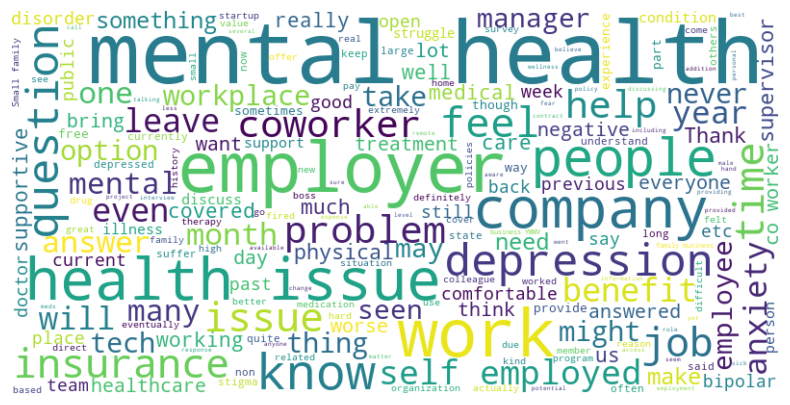

In [37]:
comments=df['comments']

# Yorumlarda eksik (NaN) değerleri temizle ve yalnızca metin olanları seç
comments = df['comments'].dropna().astype(str)

# Yorumları birleştir ve tüm metni tek bir string haline getir
text = " ".join(comment for comment in comments)

# Kelime bulutunu oluştur
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Kelime bulutunu görselleştir
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Eksenleri gizle
plt.show()


In [38]:
df.drop(['timestamp','comments'], axis=1, inplace=True)

In [39]:
df.columns  

Index(['age', 'gender', 'country', 'state', 'self_employed', 'family_history',
       'treatment', 'work_interfere', 'no_employees', 'remote_work',
       'tech_company', 'benefits', 'care_options', 'wellness_program',
       'seek_help', 'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence'],
      dtype='object')

In [40]:
df.shape

(1259, 25)

In [41]:
def grab_col_names(dataframe, cat_th=10, car_th=20):
    """
    Veri setindeki kategorik, numerik ve kategorik fakat kardinal değişkenlerin isimlerini verir.
    Not: Kategorik değişkenlerin içerisine numerik görünümlü kategorik değişkenler de dahildir.

    Parameters
    -----
        dataframe: pandas.DataFrame
            Değişken isimleri alınmak istenilen dataframe
        cat_th: int, optional
            Numerik fakat kategorik olan değişkenler için sınıf eşik değeri (varsayılan: 10)
        car_th: int, optional
            Kategorik fakat kardinal değişkenler için sınıf eşik değeri (varsayılan: 20)

    Returns
    -----
        cat_cols: list
            Kategorik değişken listesi
        num_cols: list
            Numerik değişken listesi
        cat_but_car: list
            Kategorik fakat kardinal değişken listesi
    """
    # Kategorik sütunlar
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "object"]
    
    # Sayısal ama kategorik olan sütunlar
    num_but_cat = [col for col in dataframe.columns if dataframe[col].nunique() < cat_th and dataframe[col].dtype != "object"]
    
    # Kategorik ama sürekli olan sütunlar
    cat_but_car = [col for col in dataframe.columns if dataframe[col].nunique() > car_th and dataframe[col].dtype == "object"]
    
    # Kategorik sütunları güncelleme
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]

    # Sayısal sütunlar
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "object"]
    num_cols = [col for col in num_cols if col not in num_but_cat]

    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cat_cols: {len(cat_cols)}")
    print(f"num_cols: {len(num_cols)}")
    print(f"cat_but_car: {len(cat_but_car)}")
    print(f"num_but_cat: {len(num_but_cat)}")

    return cat_cols, num_cols, cat_but_car

In [42]:
cat_cols, num_cols, cat_but_car=grab_col_names(df)

Observations: 1259
Variables: 25
cat_cols: 21
num_cols: 1
cat_but_car: 3
num_but_cat: 0


In [43]:
cat_cols

['self_employed',
 'family_history',
 'treatment',
 'work_interfere',
 'no_employees',
 'remote_work',
 'tech_company',
 'benefits',
 'care_options',
 'wellness_program',
 'seek_help',
 'anonymity',
 'leave',
 'mental_health_consequence',
 'phys_health_consequence',
 'coworkers',
 'supervisor',
 'mental_health_interview',
 'phys_health_interview',
 'mental_vs_physical',
 'obs_consequence']

In [44]:
df.head()

,age,gender,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,37,Female,United States,IL,NaN,No,Yes,Often,6-25,No,...,Yes,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No
1,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,No,...,Don't know,Don't know,Maybe,No,No,No,No,No,Don't know,No
2,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,No,...,Don't know,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No
3,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,...,No,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes
4,31,Male,United States,TX,NaN,No,No,Never,100-500,Yes,...,Don't know,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   age                        1259 non-null   int64 
 1   gender                     1259 non-null   object
 2   country                    1259 non-null   object
 3   state                      744 non-null    object
 4   self_employed              1241 non-null   object
 5   family_history             1259 non-null   object
 6   treatment                  1259 non-null   object
 7   work_interfere             995 non-null    object
 8   no_employees               1259 non-null   object
 9   remote_work                1259 non-null   object
 10  tech_company               1259 non-null   object
 11  benefits                   1259 non-null   object
 12  care_options               1259 non-null   object
 13  wellness_program           1259 non-null   object
 14  seek_hel

In [47]:
df['gender'].value_counts()

gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

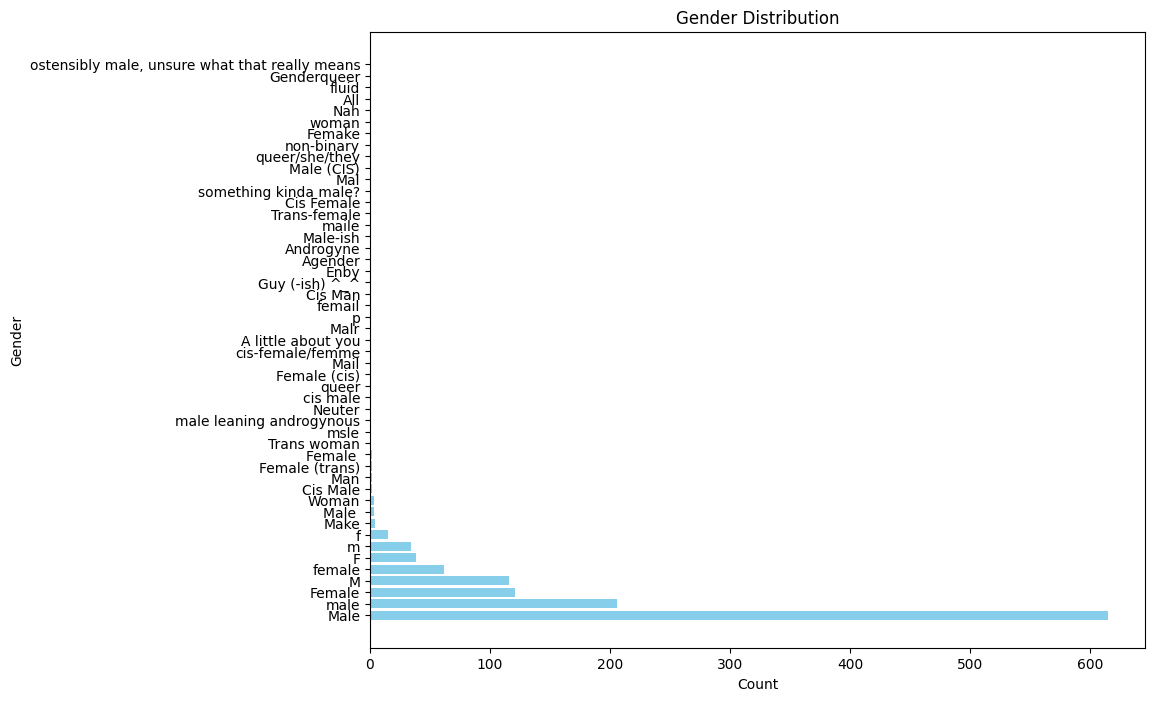

In [48]:
# Verileri görselleştirme
plt.figure(figsize=(10, 8))
plt.barh(df['gender'].value_counts().index, df['gender'].value_counts().values, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Gender')
plt.title('Gender Distribution')
plt.show()

In [49]:
# Temizleme ve standartlaştırma fonksiyonu
def standardize_gender(gender):
    gender = gender.strip().lower()
    if gender in ['male', 'm', 'man', 'cis male', 'msle', 'make', 'mail', 'ostensibly male, unsure what that really means']:
        return 'Male'
    elif gender in ['female', 'f', 'woman', 'trans woman', 'female (trans)', 'female (cis)', 'cis-female/femme']:
        return 'Female'
    elif gender in ['genderqueer', 'fluid', 'neuter', 'queer', 'all', 'male leaning androgynous']:
        return 'Other'
    else:
        return 'Unknown'

# 'gender' sütununu standartlaştırma
df['gender_standardized'] = df['gender'].apply(standardize_gender)


In [53]:
df = df.drop(columns=['gender'])
df.head()

,age,country,state,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,gender_standardized
0,37,United States,IL,NaN,No,Yes,Often,6-25,No,Yes,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,Female
1,44,United States,IN,NaN,No,No,Rarely,More than 1000,No,No,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,Male
2,32,Canada,NaN,NaN,No,No,Rarely,6-25,No,Yes,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,Male
3,31,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,No,Yes,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,Male
4,31,United States,TX,NaN,No,No,Never,100-500,Yes,Yes,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,Male


In [55]:
df['gender_standardized'].value_counts()

gender_standardized
Male       986
Female     247
Unknown     20
Other        6
Name: count, dtype: int64